In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

2.	Получите описание данных: число записей, число полей. 

In [2]:
planets = pd.read_csv('planets.csv', sep=';')
planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


Всего 1035 строк, значит 1035 записей и 6 полей, если считать индекс то 7. (Индекс это порядковый)


3.	По каждому полю определите:
тип поля: категориальный, порядковый, числовой, текстовый)
число имеющихся значений,
число уникальных значений,
число отсутствующих значений.

Описание:
1. method (Способ обнаружения) - категориальный
2. number (Число планет в системе своего «солнца») - числовой
3. orbital_period (Период обращения вокруг своего «солнца») - числовой
4. mass (Масса планеты) - числовой
5. distance (Расстояние от центра планетной системы до нашего Солнца) - числовой
6. year (Год обнаружения) - числовой

In [3]:
fields = planets.columns
for field in fields:
    count_values = planets[field].count()
    unique_values = planets[field].nunique()
    missing_values = planets[field].isnull().sum()

    print(f"Статистика для поля '{field}':")
    print(f"Число значений: {count_values}")
    print(f"Число уникальных значений: {unique_values}")
    print(f"Число отсутствующих значений: {missing_values}")
    print("-" * 40)


Статистика для поля 'method':
Число значений: 1035
Число уникальных значений: 10
Число отсутствующих значений: 0
----------------------------------------
Статистика для поля 'number':
Число значений: 1035
Число уникальных значений: 7
Число отсутствующих значений: 0
----------------------------------------
Статистика для поля 'orbital_period':
Число значений: 992
Число уникальных значений: 988
Число отсутствующих значений: 43
----------------------------------------
Статистика для поля 'mass':
Число значений: 513
Число уникальных значений: 381
Число отсутствующих значений: 522
----------------------------------------
Статистика для поля 'distance':
Число значений: 808
Число уникальных значений: 552
Число отсутствующих значений: 227
----------------------------------------
Статистика для поля 'year':
Число значений: 1035
Число уникальных значений: 23
Число отсутствующих значений: 0
----------------------------------------


4.	По каждому числовому полю определите: мин, макс, среднее, медиану, среднеквадратическое отклонение.

In [4]:
fields_numeric = fields[1:]
print(planets.describe())
for field in fields_numeric:
    f_max = planets[field].max()
    f_min = planets[field].min()
    f_mean = planets[field].mean()
    f_std = planets[field].std()
    f_median = planets[field].median()
    print(f'Статистика по полю {field}')
    print(f'Максимальное значение {f_max}')
    print(f'Минимальное значение {f_min}')
    print(f'Среднее {f_mean}')
    print(f'Отклонение: {f_std}')
    print(f'Медиана: {f_median}')
    print('-' * 40)

            number  orbital_period        mass     distance         year
count  1035.000000      992.000000  513.000000   808.000000  1035.000000
mean      1.785507     2002.917596    2.638161   264.069282  2009.070531
std       1.240976    26014.728304    3.818617   733.116493     3.972567
min       1.000000        0.090706    0.003600     1.350000  1989.000000
25%       1.000000        5.442540    0.229000    32.560000  2007.000000
50%       1.000000       39.979500    1.260000    55.250000  2010.000000
75%       2.000000      526.005000    3.040000   178.500000  2012.000000
max       7.000000   730000.000000   25.000000  8500.000000  2014.000000
Статистика по полю number
Максимальное значение 7
Минимальное значение 1
Среднее 1.7855072463768116
Отклонение: 1.2409761743386776
Медиана: 1.0
----------------------------------------
Статистика по полю orbital_period
Максимальное значение 730000.0
Минимальное значение 0.09070629
Среднее 2002.9175960947582
Отклонение: 26014.728304062508
Мед

5.	По каждой категории: число планет и средние значения остальных признаков.

In [5]:
grouped = planets.groupby('method').agg(
    {'number': 'count', 'orbital_period': 'mean', 'mass': 'mean', 'distance': 'mean', 'year': 'mean'})

print(grouped)

                               number  orbital_period      mass     distance  \
method                                                                         
Astrometry                          2      631.180000       NaN    17.875000   
Eclipse Timing Variations           9     4751.644444  5.125000   315.360000   
Imaging                            38   118247.737500       NaN    67.715937   
Microlensing                       23     3153.571429       NaN  4144.000000   
Orbital Brightness Modulation       3        0.709307       NaN  1180.000000   
Pulsar Timing                       5     7343.021201       NaN  1200.000000   
Pulsation Timing Variations         1     1170.000000       NaN          NaN   
Radial Velocity                   553      823.354680  2.630699    51.600208   
Transit                           397       21.102073  1.470000   599.298080   
Transit Timing Variations           4       79.783500       NaN  1104.333333   

                                      y

6.	Определите число записей, имеющих пропуски данных и общее число пропусков.

In [6]:
num_rows_with_missing_data = planets[planets.isnull().any(axis=1)].shape[0]
total_missing_values = planets.isnull().sum().sum()

print(f"Число записей с пропущенными данными: {num_rows_with_missing_data}")
print(f"Общее число пропусков: {total_missing_values}")

Число записей с пропущенными данными: 537
Общее число пропусков: 792


7.	Для каждого числа возможных пропусков в отдельной записи (от 0 до укажите, в скольких записях столько пропусков.

In [7]:
missing_counts = {}

for _, row in planets.iterrows():

    num_missing = row.isnull().sum()


    if num_missing in missing_counts:
        missing_counts[num_missing] += 1
    else:
        missing_counts[num_missing] = 1


for num_missing, count in missing_counts.items():
    print(f"Число записей с {num_missing} пропусками: {count}")

Число записей с 0 пропусками: 498
Число записей с 1 пропусками: 293
Число записей с 2 пропусками: 233
Число записей с 3 пропусками: 11


8.	Для каждого года обнаружения планеты укажите среднее число пропусков данных для одной планеты.

In [8]:
time_planets = planets
time_planets['null_counts'] = time_planets.isna().sum(axis=1)


grouped = time_planets.groupby('year')['null_counts'].mean().reset_index()
grouped.columns = ['year', 'avg_null']
grouped

,year,avg_null
0,1989,0.000000
1,1992,2.000000
2,1994,2.000000
3,1995,0.000000
4,1996,0.333333
5,1997,0.000000
6,1998,0.000000
7,1999,0.066667
8,2000,0.125000
9,2001,0.083333


9.	Для каждой категории укажите среднее число пропусков данных для одной планеты.

In [9]:

method_avg_null = time_planets.groupby('method')['null_counts'].mean().reset_index()
method_avg_null.columns = ['method', 'avg_null']
print(method_avg_null)


                          method  avg_null
0                     Astrometry  1.000000
1      Eclipse Timing Variations  1.333333
2                        Imaging  1.842105
3                   Microlensing  2.260870
4  Orbital Brightness Modulation  1.333333
5                  Pulsar Timing  1.800000
6    Pulsation Timing Variations  2.000000
7                Radial Velocity  0.119349
8                        Transit  1.433249
9      Transit Timing Variations  1.500000


10.	Удалите записи с числом пропусков более 2-х.

In [10]:
df = planets.drop('null_counts', axis=1)
planets_final_1 = df.dropna(thresh=4)

planets_final_1

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


11.	Замените пропуски на среднее значение признака по всему набору

In [11]:
numerical_columns = planets_final_1.columns[1:]
for column in numerical_columns:
    mean_value = planets_final_1[column].mean()
    planets_final_1[column].fillna(mean_value, inplace=True)


data = planets_final_1.reset_index(drop=True)
data

C:\Users\vik\AppData\Local\Temp\ipykernel_16456\506139654.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  planets_final_1[column].fillna(mean_value, inplace=True)


,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.100000,77.40,2006
1,Radial Velocity,1,874.774000,2.210000,56.95,2008
2,Radial Velocity,1,763.000000,2.600000,19.84,2011
3,Radial Velocity,1,326.030000,19.400000,110.62,2007
4,Radial Velocity,1,516.220000,10.500000,119.47,2009
...,...,...,...,...,...,...
1019,Transit,1,3.941507,2.638161,172.00,2006
1020,Transit,1,2.615864,2.638161,148.00,2007
1021,Transit,1,3.191524,2.638161,174.00,2007
1022,Transit,1,4.125083,2.638161,293.00,2008


12.	Добавьте поле «код планеты», куда внесите составной код, типа В74, построенный по правилу: в качестве числа уникальный номер планетной системы, где обнаружена планета (признак принадлежности нескольких планет к одной системе: расположение в списке рядом, одинаковое число планет в системе, одинаковое расстояние до Солнца), а в качестве буквы – номер планеты от центра системы (1-А, 2-В, 3-С, 4-D, …), который определяется по возрастанию периода обращения.

In [12]:
counter = 0
minus_index = 0
letters = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H'}
data['planet_code'] = ""
data.loc[0, 'planet_code'] = f'{letters[0]}' + f'{counter + 1}'

for i in range(1, len(data)):
    if data['number'][i] == data['number'][i - 1] and data['distance'][i] == data['distance'][i - 1]:
        if data['number'][i] > counter + 1:
            counter += 1

        minus_index += 1
    else:
        counter = 0
    data.at[i, 'planet_code'] = f'{letters[counter]}{i - minus_index+1}'
data


,method,number,orbital_period,mass,distance,year,planet_code
0,Radial Velocity,1,269.300000,7.100000,77.40,2006,A1
1,Radial Velocity,1,874.774000,2.210000,56.95,2008,A2
2,Radial Velocity,1,763.000000,2.600000,19.84,2011,A3
3,Radial Velocity,1,326.030000,19.400000,110.62,2007,A4
4,Radial Velocity,1,516.220000,10.500000,119.47,2009,A5
...,...,...,...,...,...,...,...
1019,Transit,1,3.941507,2.638161,172.00,2006,A688
1020,Transit,1,2.615864,2.638161,148.00,2007,A689
1021,Transit,1,3.191524,2.638161,174.00,2007,A690
1022,Transit,1,4.125083,2.638161,293.00,2008,A691


13.	Для каждого нового набора постройте диаграммы четырех типов:
•	- гистограмма каждого числового признака по всему датасету и по отдельным категориям,
•	- для каждого числового признака набор ящиков с усами по всем категориям,
•	- тепловую карту корреляций для числовых признаков (номер планеты в системе, число планет в системе, период обращения, масса, расстояние, год обнаружения) для всего датасета, для самой массовой и для самой редкой категории.
•	- парные диаграммы рассеяния для всех пар числовых признаков, имеющих более 50 уникальных значений, по всему датасету.


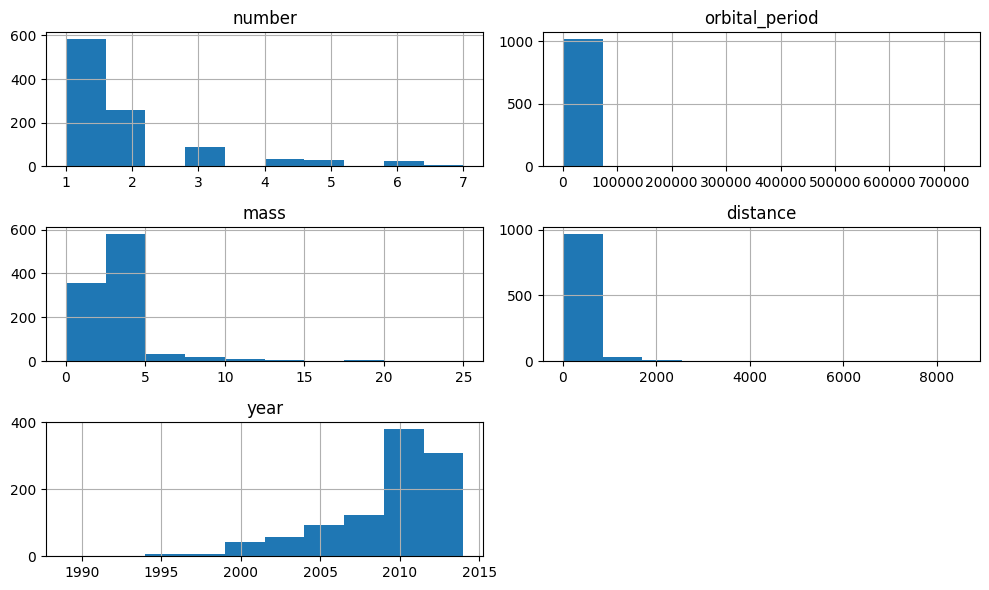

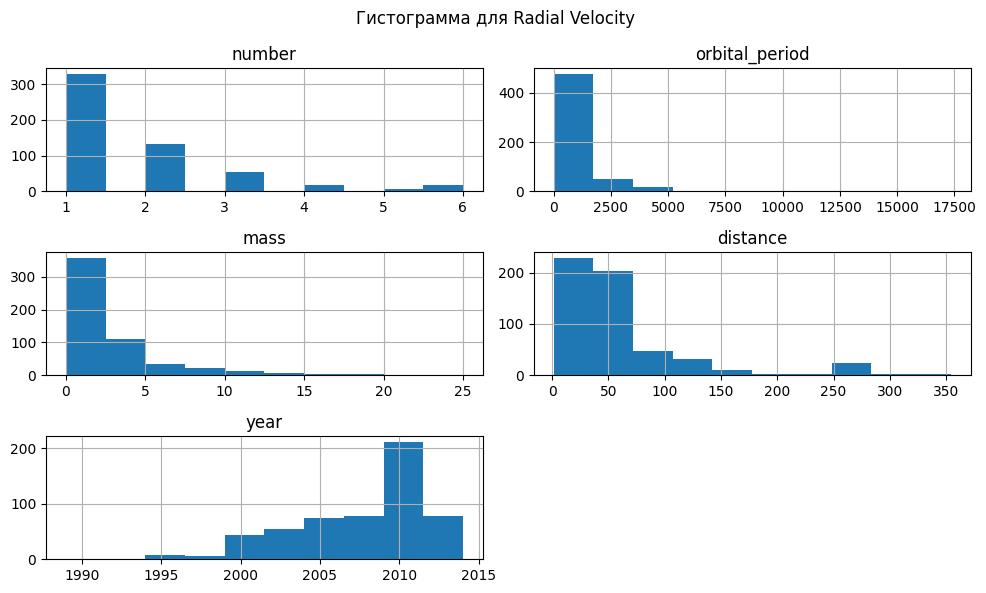

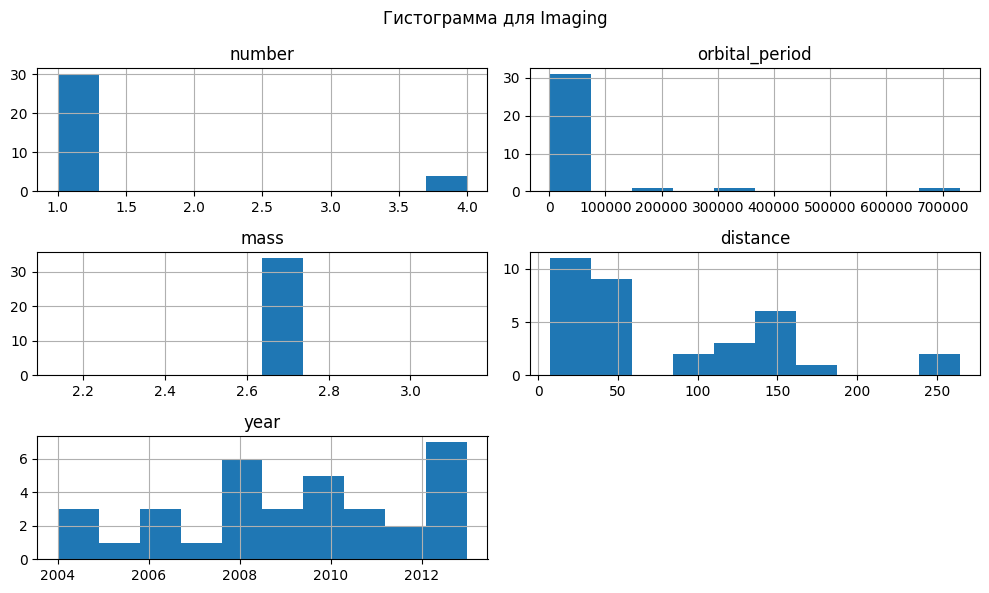

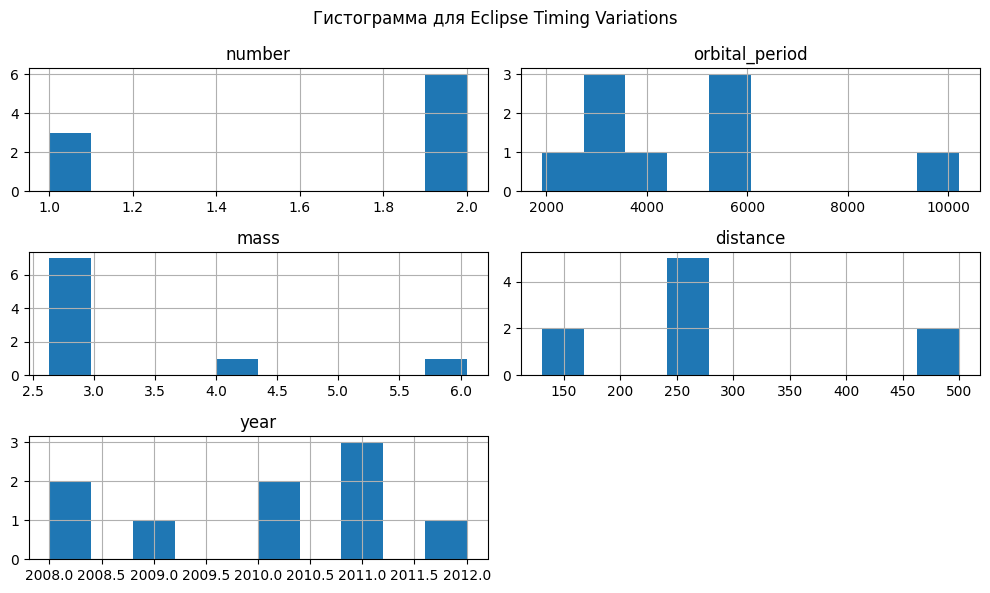

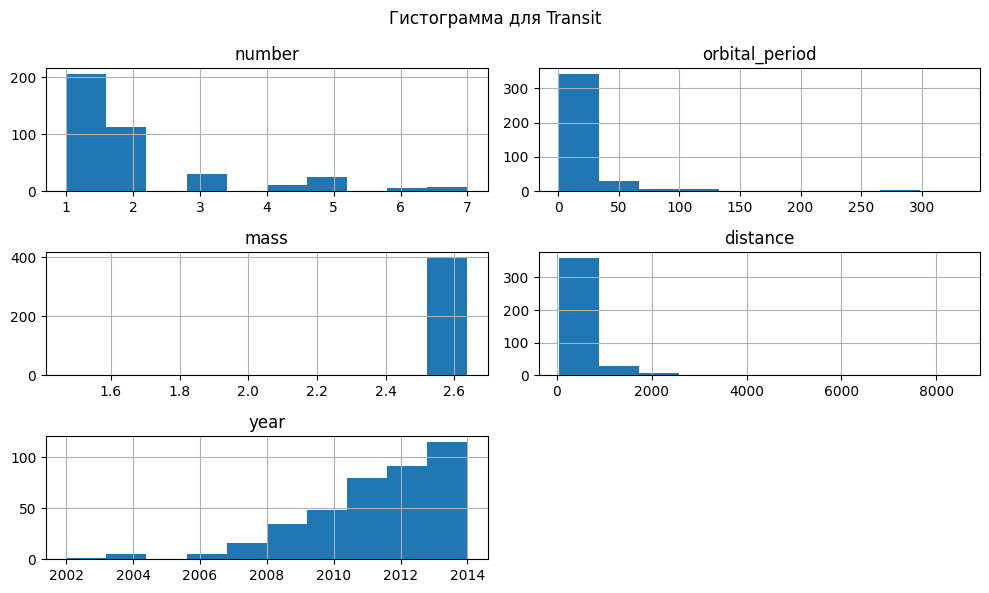

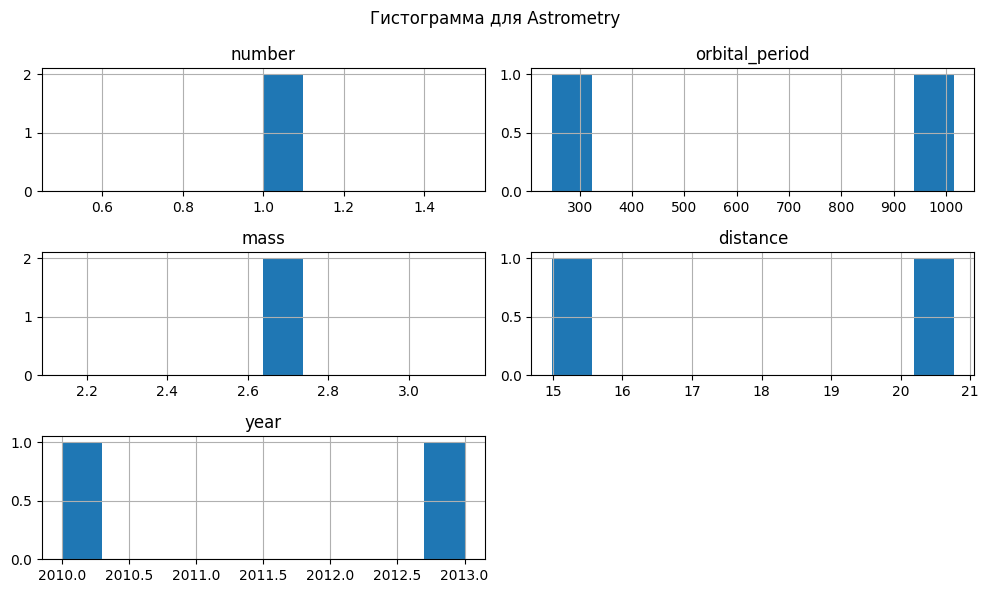

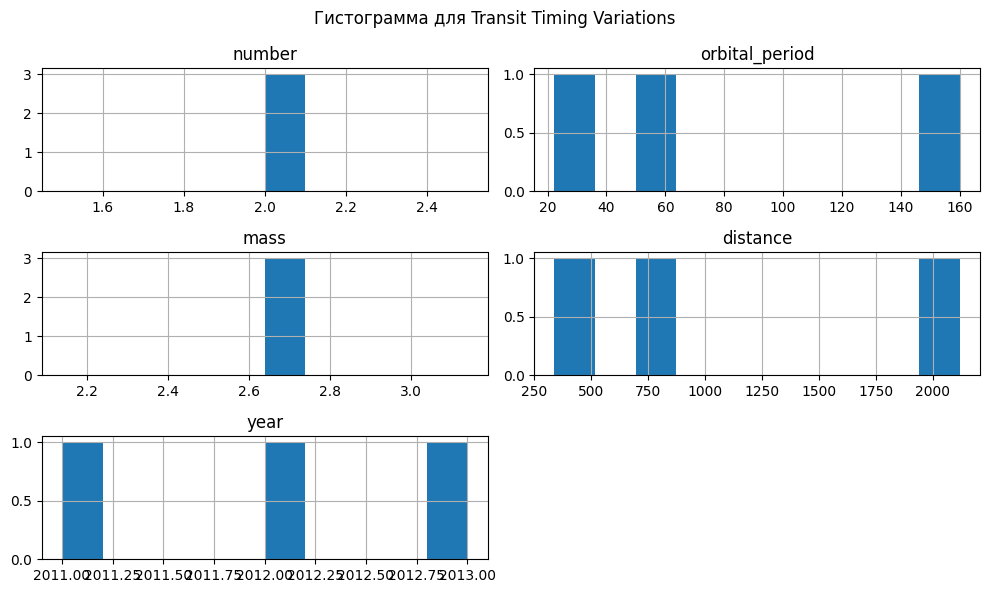

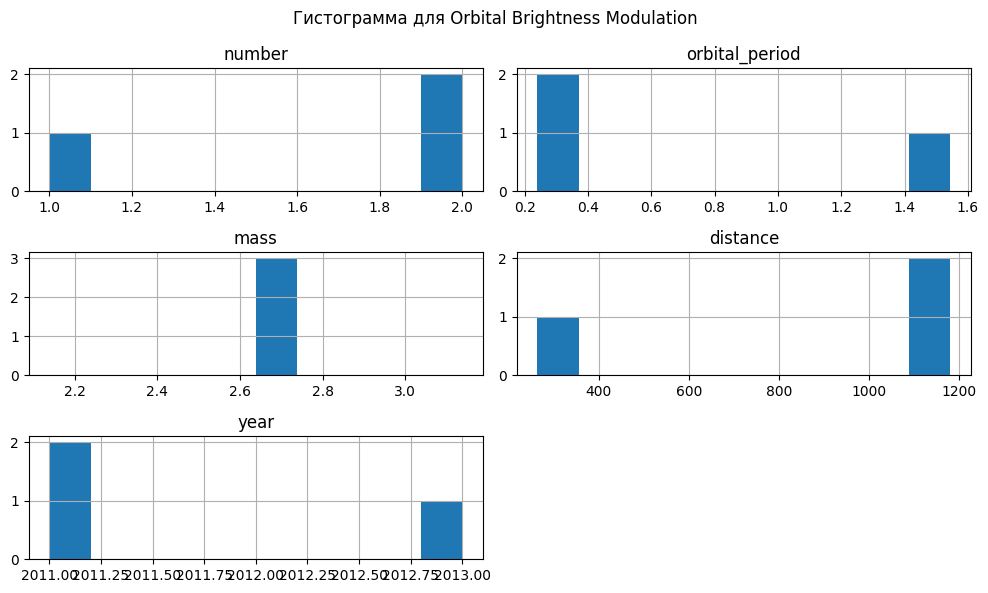

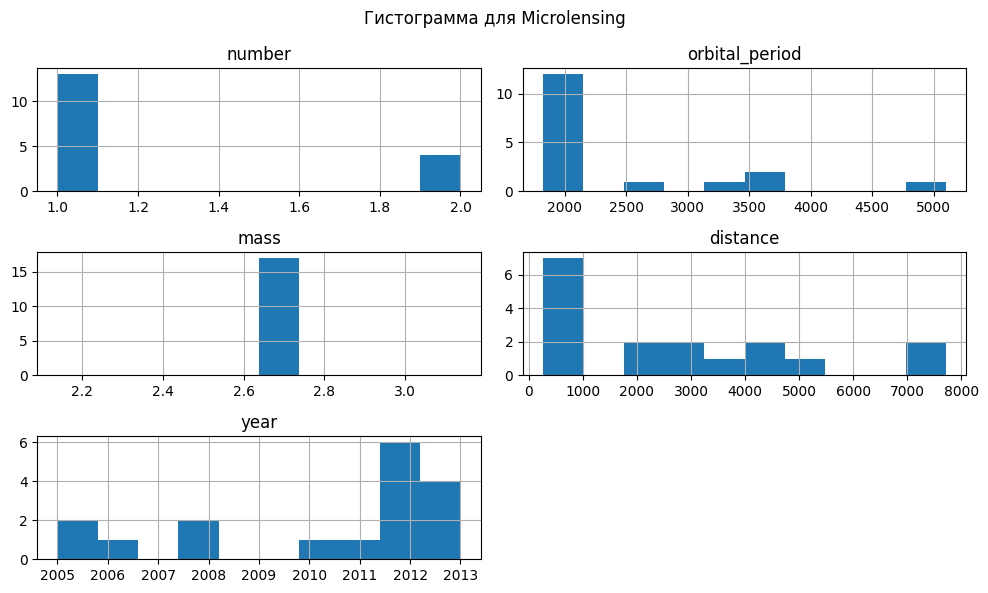

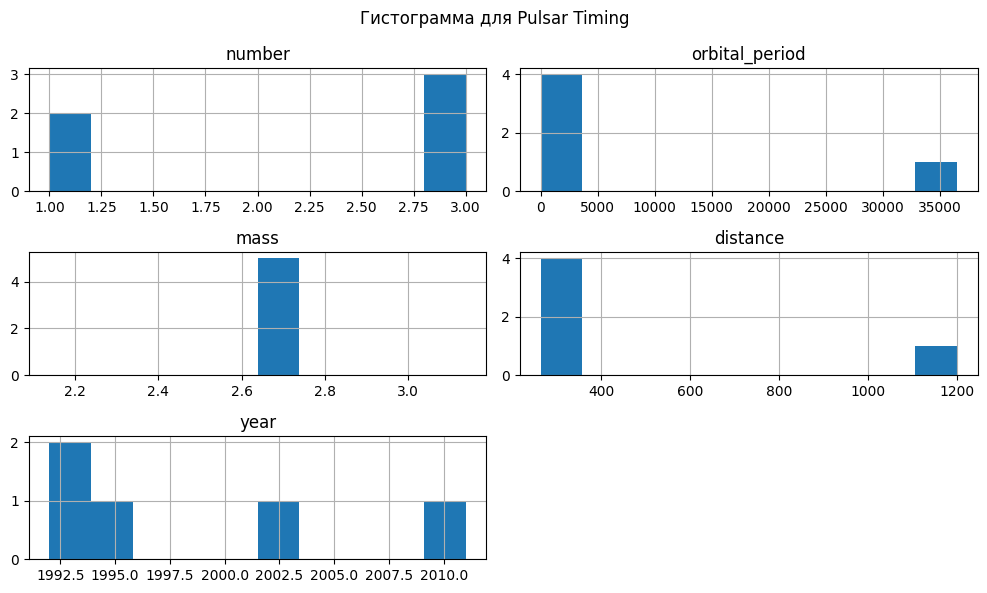

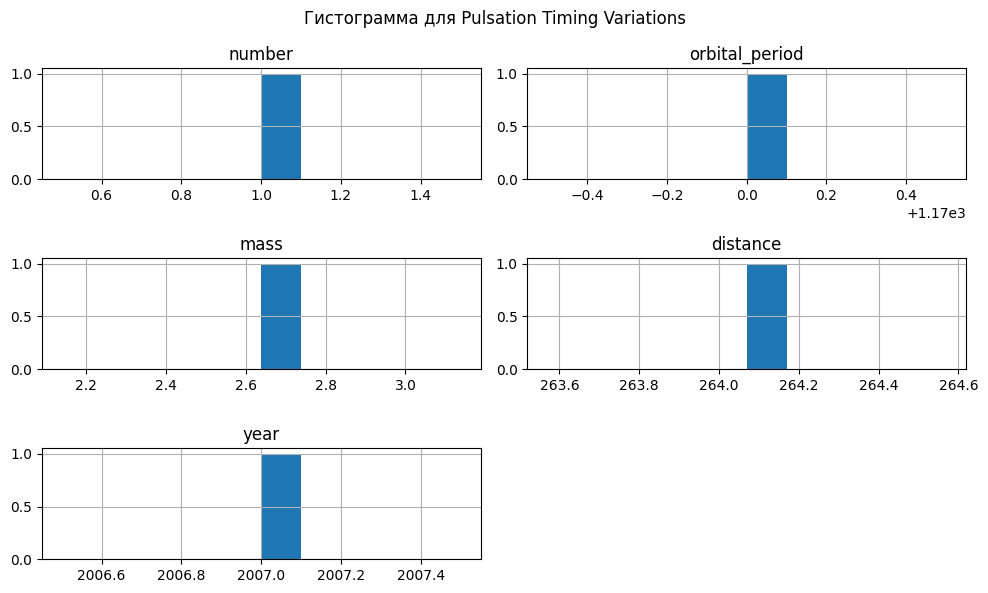

In [13]:
data.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

categories = data['method'].unique()
for category in categories:
    subset = data[data['method'] == category]
    subset.hist(figsize=(10, 6))
    plt.suptitle(f'Гистограмма для {category}')
    plt.xlabel('Значение') 
    plt.ylabel('Количество')  
    plt.tight_layout()
    plt.show()


C:\Users\vik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


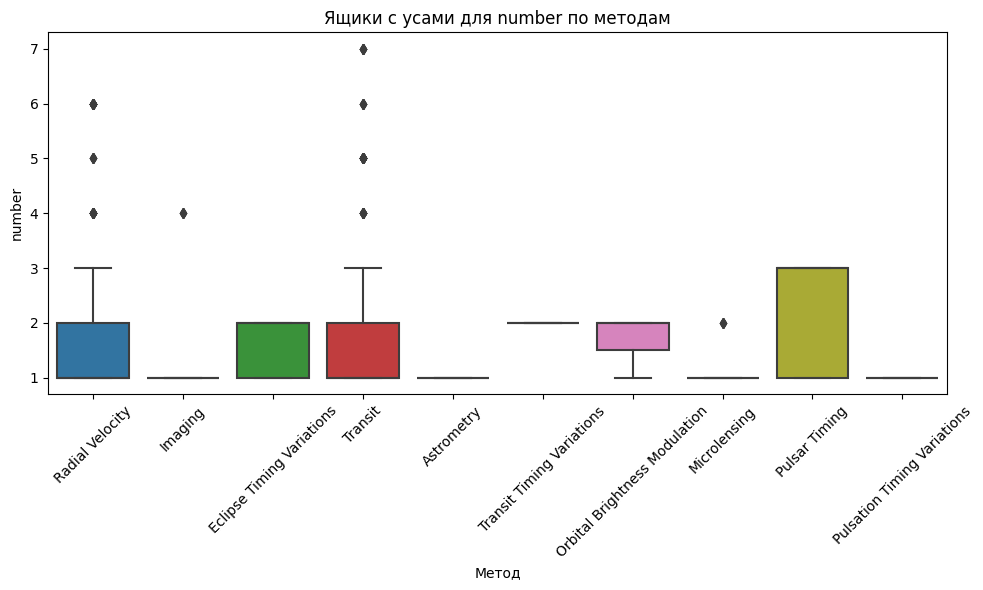

C:\Users\vik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


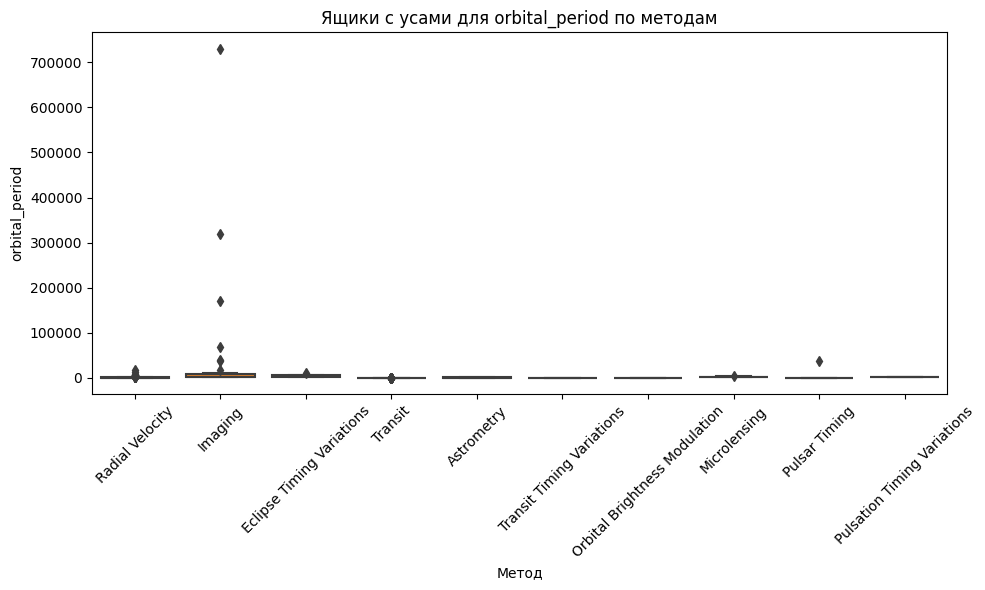

C:\Users\vik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


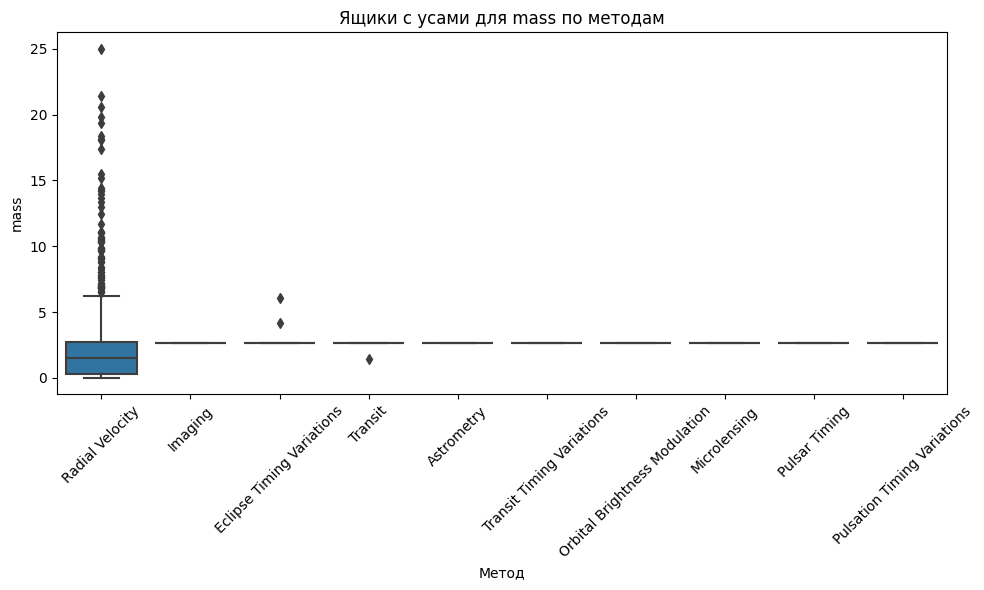

C:\Users\vik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


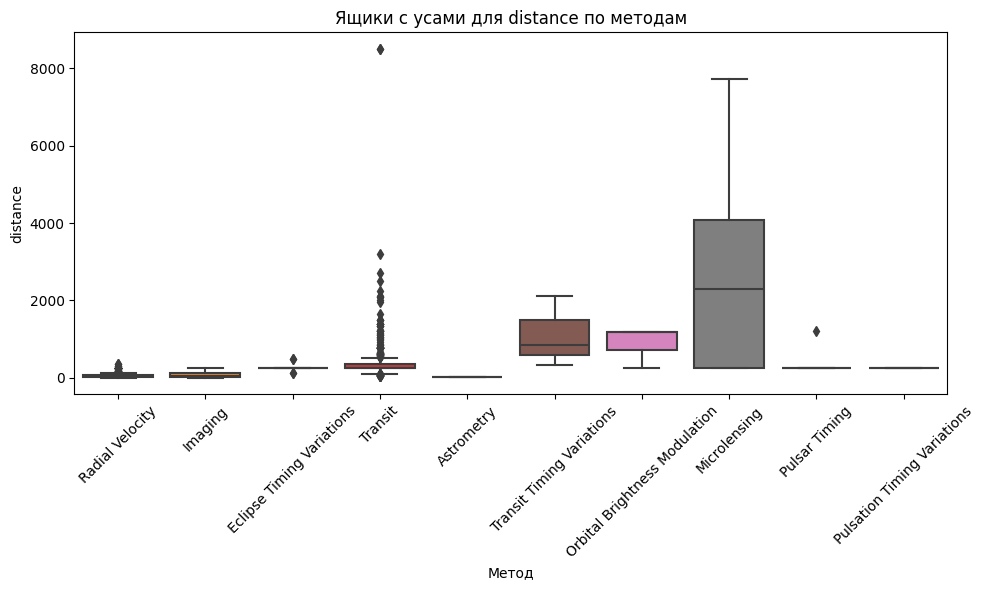

C:\Users\vik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


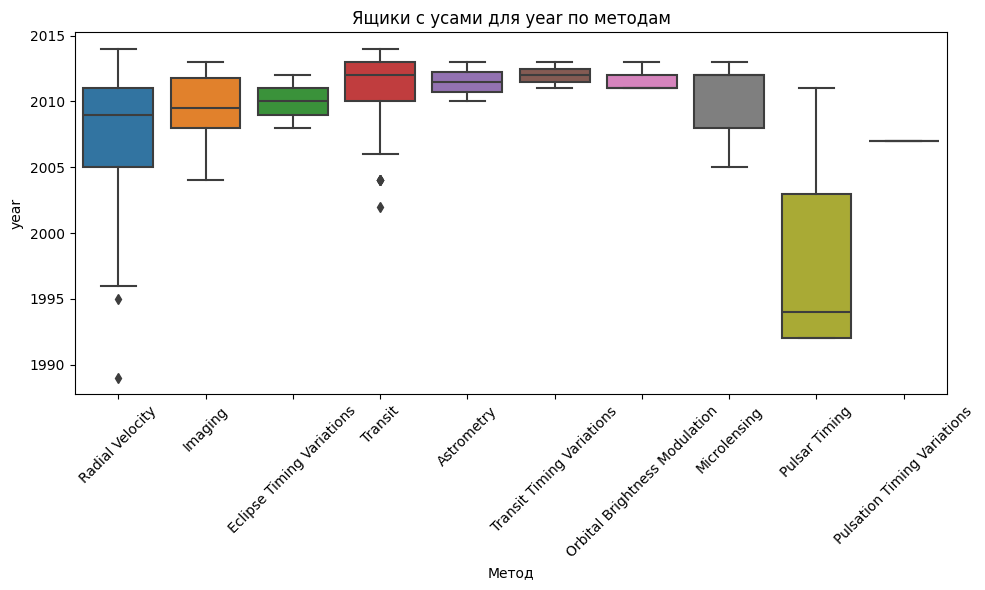

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


numeric_features = ['number', 'orbital_period', 'mass', 'distance', 'year']

for feature in numeric_features:
    plt.figure(figsize=(10, 6))

 
    sns.boxplot(x='method', y=feature, data=data)

    plt.xlabel('Метод')
    plt.ylabel(feature)
    plt.title(f'Ящики с усами для {feature} по методам')

 
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


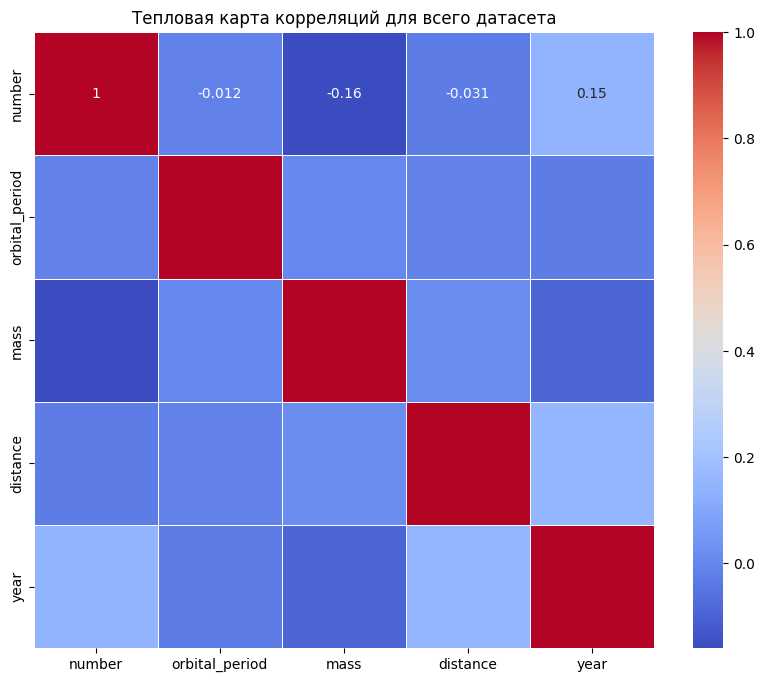

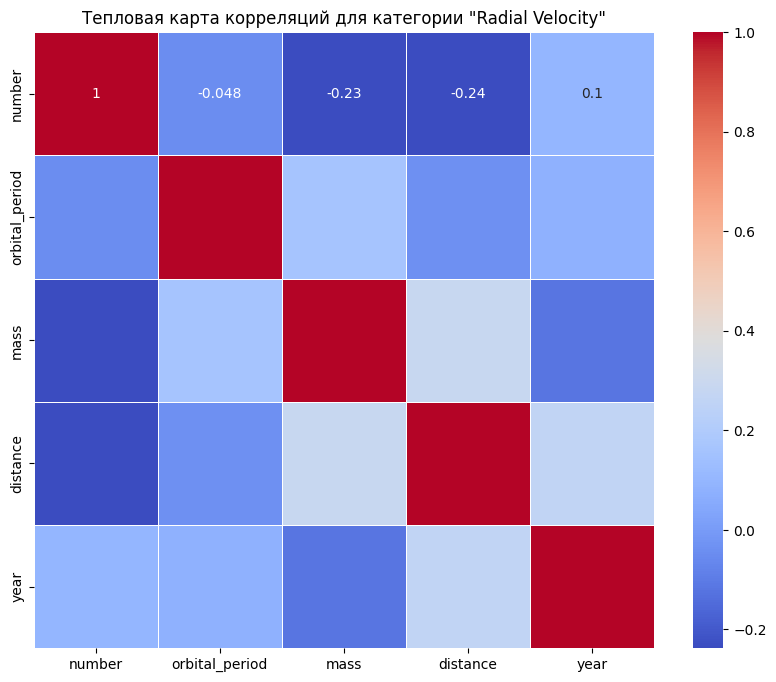

C:\Users\vik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\vik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
C:\Users\vik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


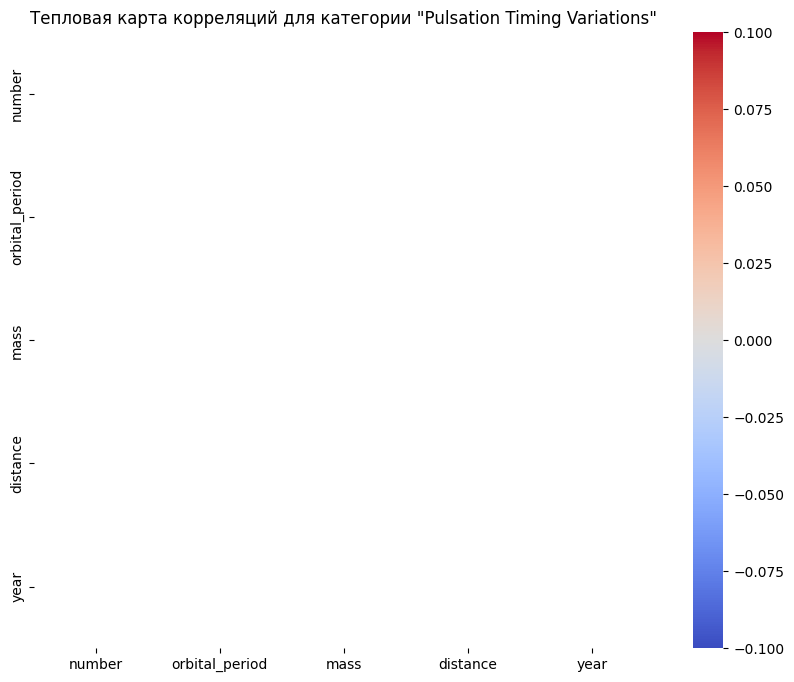

In [15]:
# 3



numeric_features = ['number', 'orbital_period', 'mass', 'distance', 'year']
correlation_matrix = data[numeric_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Тепловая карта корреляций для всего датасета')
plt.show()


most_common_category = data['method'].mode()[0]
subset = data[data['method'] == most_common_category]
correlation_matrix_most_common = subset[numeric_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_most_common, annot=True, cmap='coolwarm', linewidths=.5)
plt.title(f'Тепловая карта корреляций для категории "{most_common_category}"')
plt.show()


rarest_category = data['method'].value_counts().idxmin()
subset = data[data['method'] == rarest_category]
correlation_matrix_rarest = subset[numeric_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_rarest, annot=True, cmap='coolwarm', linewidths=.5)
plt.title(f'Тепловая карта корреляций для категории "{rarest_category}"')
plt.show()


Вывод: 

C:\Users\vik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

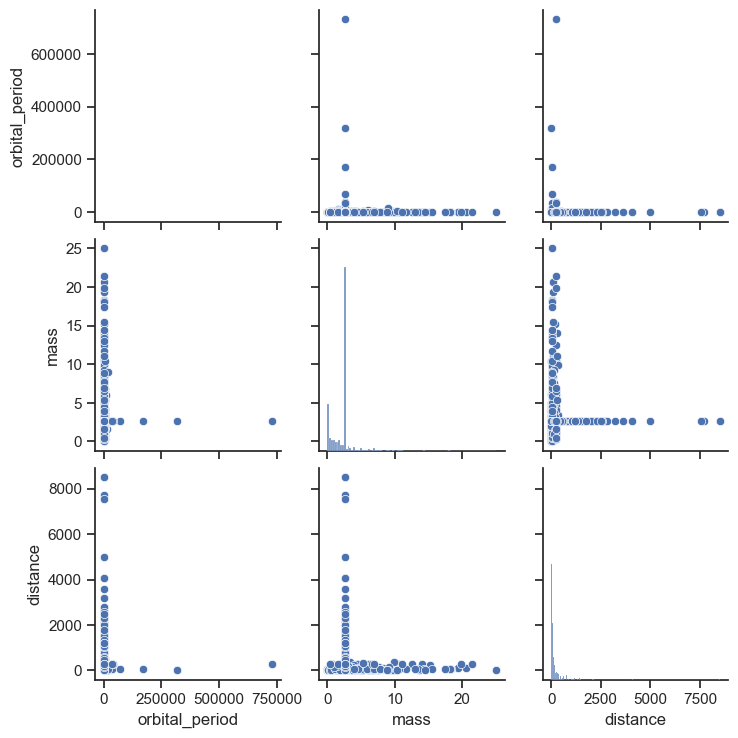

In [16]:
# 4
import seaborn as sns
import matplotlib.pyplot as plt


numeric_features = [col for col in data.columns if data[col].nunique() > 50 and col != 'method' and col !='planet_code']


sns.set(style="ticks")
sns.pairplot(data, vars=numeric_features)
plt.show()


Вывод. У 692 звезд обнаружена планетная система (последнее значение в planet_code)  
Самая большая корреляции у дистанции с годом. Тк с развитием технологий можно было найти более дальние планеты
Метод обнаружения radial velocity пользовался наибольшей популярностью в 2010 году и обнаруживал планеты с небольшой дистанцией(до 100)
